# TRABAJO PRÁCTICO N°1

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
import imageio
# do not use aliases, 
# if the package is only used a few times in the code or 
# if the name is small enough (here only to open and to store an image)

we are working in float numbers [0,1] in image processing.

## Abrimos la imagen local para realizar la actividad

La propuesta para esta actividad consiste en manipular independientemente la
luminancia y la saturación de una imagen.

Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ,
luego alteramos los valores de Y (para cambiar la luminancia) o de IQ (para cambiar
la saturación).

Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una
nueva imagen. 

C:\Users\BRIAN\AppData\Local\Temp\ipykernel_51856\1799060496.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = np.clip(imageio.imread('Charly.bmp')/255.0, 0.0, 1.0)


(288, 282, 3) float64


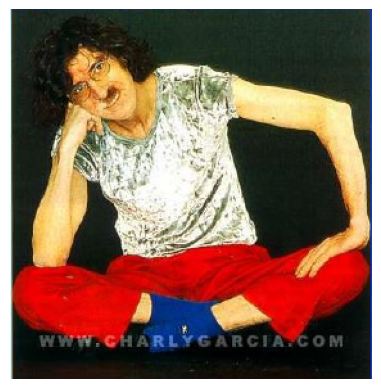

In [14]:
im = np.clip(imageio.imread('Charly.bmp')/255.0, 0.0, 1.0)

"""
Cargan una imagen utilizando la función imageio.imread(). 
Luego, se dividen los valores de los píxeles de la imagen por 255 para normalizarla en el rango [0, 1]. 
"""

print(im.shape,im.dtype)
plt.imshow(im)
plt.axis('off')
plt.show()

## Consignas

Podríamos llamar a al coeficiente de luminancia (si es menor que uno, baja la luminancia, y
viceversa), y b al coeficiente de saturación (si es menor que uno baja la saturación, y
viceversa). El workflow a implementar consiste en los siguientes pasos:

1.Normalizar los valores de RGB del pixel

2.RGB -> YIQ (utilizando la segunda matriz)

3.Y’ := aY ;

4.I’ := bI ; Q’ := bQ ;

5.Chequear que Y’ <= 1 (para que no se vaya de rango)

6.Chequear -0.5957 < I’ < 0.5957 y -0.5226 < Q’ < 0.5226

7.Y’I’Q’ -> R’G’B’ (el RGB normalizado del pixel procesado)

8.Convertir R’G’B’ a bytes y graficar el pixel 

In [18]:
# Paso 2: Funcion que cambia de espacio de color de RGB a YIQ
def rgb_to_yiq(rgb):
    yiq = np.zeros(rgb.shape)
    yiq[:, :, 0] = 0.229 * rgb[:, :, 0] + 0.587 * rgb[:, :, 1] + 0.114 * rgb[:, :, 2]
    yiq[:, :, 1] = 0.595716 * rgb[:, :, 0] - 0.274453 * rgb[:, :, 1] - 0.321263 * rgb[:, :, 2]
    yiq[:, :, 2] = 0.211456 * rgb[:, :, 0] - 0.522591 * rgb[:, :, 1] + 0.311135 * rgb[:, :, 2]
    return yiq

## La conversión de RGB a YIQ, yiq es una lista o arreglo que contiene tres valores:

Y (Luminancia): El primer valor representa la luminancia del color. Es una medida de la intensidad o el brillo del color y es generalmente un número en el rango [0, 1], donde 0 es negro y 1 es blanco.

I (Crominancia en el eje de color U/V o Cb/Cr): El segundo valor representa la componente de crominancia en el eje de color U/V o Cb/Cr. Puede ser positivo o negativo y generalmente tiene un rango específico que depende del estándar de color que se esté utilizando.

Q (Crominancia en el eje de color U/V o Cb/Cr): El tercer valor representa la componente de crominancia en el eje de color U/V o Cb/Cr. Al igual que I, puede ser positivo o negativo y tiene un rango específico.

Por ejemplo:
yiq = [0.72, 0.12, -0.34]

In [26]:
# Paso 5: Comprobar que Y' <= 1 - NO SE UTILIZA
def check_y(yiq):
        yiq_prima[:, :, 0] = np.clip(yiq[:, :, 0], 0, 1)
    return yiq_prima

"""
np.clip se utiliza para limitar los valores del arreglo dentro del rango específico.
En este caso, la función se utiliza para asegurar de que los valores de luminancia (Y) se mantengan
dentro del rango válido de [0, 1].

La función recorre cada elemento de 'y' y ajusta cualquier valor que esté por debajo de 0 a 0 y 
cualquier valor que esté por encima de 1 a 1
"""

"\nnp.clip se utiliza para limitar los valores del arreglo dentro del rango específico.\nEn este caso, la función se utiliza para asegurar de que los valores de luminancia (Y) se mantengan\ndentro del rango válido de [0, 1].\n\nLa función recorre cada elemento de 'y' y ajusta cualquier valor que esté por debajo de 0 a 0 y \ncualquier valor que esté por encima de 1 a 1\n"

In [27]:
# Paso 6: Comprobar los rangos de I' y Q' - NO SE UTILIZA
def check_iq(yiq):
    yiq_prima[:, :, 1] = np.clip(yiq[:, :, 1], -0.5957, 0.5957)
    yiq_prima[:, :, 2] = np.clip(yiq[:, :, 2], -0.5226, 0.5226)
    #np.clip se utiliza para limitar los valores de cada arreglo dentro del rango específico.
    return yiq_prima

In [19]:
# Paso 7: Funcion que cambia de espacio de color Y'I'Q' a RGB
def yiq_to_rgb(yiq):
    rgb = np.zeros(yiq.shape)
    rgb[:, :, 0] = yiq[:, :, 0] + 0.9663 * yiq[:, :, 1] + 0.6210 * yiq[:, :, 2]
    rgb[:, :, 1] = yiq[:, :, 0] - 0.2721 * yiq[:, :, 1] - 0.6474 * yiq[:, :, 2]
    rgb[:, :, 2] = yiq[:, :, 0] - 1.1070 * yiq[:, :, 1] + 1.7046 * yiq[:, :, 2]
    return rgb

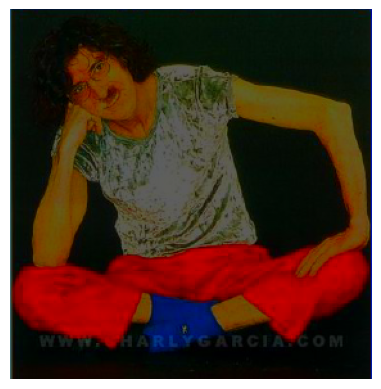

In [30]:
# Manipulación de la imagen
yiq = np.zeros_like(im)
yiq_prima = np.zeros_like(im)
rgb_prima = np.zeros_like(im)

"""
np.zeros_like(im) crea una matriz de ceros con la misma forma que la matriz im. 
Esto significa que manipulated_image tendrá las mismas dimensiones (número de filas y columnas) que la matriz im.

Esta variable se crea para almacenar los resultados de la manipulación de la imagen original.
"""
# Paso 2: Convertir RGB a YIQ
yiq = rgb_to_yiq(im)

# Paso 3: Escalar los valores de Y (Luminancia)
a = 0.4  # Ajustar el valor 'a' según sea necesario
yiq_prima[:, :, 0] = yiq[:, :, 0] * a

# Paso 4: Escalar los valores de I y Q (Cromancia)
b = 1  # Ajustar el valor 'b' según sea necesario
yiq_prima[:, :, 1] = yiq[:, :, 1] * b
yiq_prima[:, :, 2] = yiq[:, :, 2] * b

# Paso 5: Chequear que Y' <= 1
yiq_prima[:, :, 0] = np.clip(yiq_prima[:, :, 0], 0, 1)

# Paso 6: Chequear los rangos de I' y Q'
yiq_prima[:, :, 1] = np.clip(yiq_prima[:, :, 1], -0.5957, 0.5957)
yiq_prima[:, :, 2] = np.clip(yiq_prima[:, :, 2], -0.5226, 0.5226)

# Paso 7: Convertir YIQ a RGB'
rgb_prima = yiq_to_rgb(yiq_prima)

# Paso 8: Convertir RGB' a bytes y graficar el pixel
plt.imshow(np.clip(rgb_prima, 0, 1))
plt.axis('off')
plt.show()